# Diagnosing breast cancer with k-NN

## Import data file
We will use the "Breast Cancer Wisconsin Diagnostic" dataset from the UCI Machine Learning Repository, which is available at http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29.

The breast cancer data includes 569 examples of cancer biopsies, each with 32 features. One feature is an identification number, another is the cancer diagnosis, and 30 are numeric-valued laboratory measurements. The diagnosis is coded as M to indicate malignant or B to indicate benign.

In [6]:
# Load data
wbcd <- read.csv("https://resources.oreilly.com/examples/9781784393908/raw/ac9fe41596dd42fc3877cfa8ed410dd346c43548/Machine%20Learning%20with%20R,%20Second%20Edition_Code/Chapter%2003/wisc_bc_data.csv")

# Examine the structure of the wbcd data frame
str(wbcd)
wbcd

'data.frame':	569 obs. of  32 variables:
 $ id               : int  87139402 8910251 905520 868871 9012568 906539 925291 87880 862989 89827 ...
 $ diagnosis        : chr  "B" "B" "B" "B" ...
 $ radius_mean      : num  12.3 10.6 11 11.3 15.2 ...
 $ texture_mean     : num  12.4 18.9 16.8 13.4 13.2 ...
 $ perimeter_mean   : num  78.8 69.3 70.9 73 97.7 ...
 $ area_mean        : num  464 346 373 385 712 ...
 $ smoothness_mean  : num  0.1028 0.0969 0.1077 0.1164 0.0796 ...
 $ compactness_mean : num  0.0698 0.1147 0.078 0.1136 0.0693 ...
 $ concavity_mean   : num  0.0399 0.0639 0.0305 0.0464 0.0339 ...
 $ points_mean      : num  0.037 0.0264 0.0248 0.048 0.0266 ...
 $ symmetry_mean    : num  0.196 0.192 0.171 0.177 0.172 ...
 $ dimension_mean   : num  0.0595 0.0649 0.0634 0.0607 0.0554 ...
 $ radius_se        : num  0.236 0.451 0.197 0.338 0.178 ...
 $ texture_se       : num  0.666 1.197 1.387 1.343 0.412 ...
 $ perimeter_se     : num  1.67 3.43 1.34 1.85 1.34 ...
 $ area_se          : num  1

id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,⋯,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
87139402,B,12.320,12.39,78.85,464.1,0.10280,0.06981,0.039870,0.037000,⋯,13.50,15.64,86.97,549.1,0.1385,0.12660,0.124200,0.09391,0.2827,0.06771
8910251,B,10.600,18.95,69.28,346.4,0.09688,0.11470,0.063870,0.026420,⋯,11.88,22.94,78.28,424.8,0.1213,0.25150,0.191600,0.07926,0.2940,0.07587
905520,B,11.040,16.83,70.92,373.2,0.10770,0.07804,0.030460,0.024800,⋯,12.41,26.44,79.93,471.4,0.1369,0.14820,0.106700,0.07431,0.2998,0.07881
868871,B,11.280,13.39,73.00,384.8,0.11640,0.11360,0.046350,0.047960,⋯,11.92,15.77,76.53,434.0,0.1367,0.18220,0.086690,0.08611,0.2102,0.06784
9012568,B,15.190,13.21,97.65,711.8,0.07963,0.06934,0.033930,0.026570,⋯,16.20,15.73,104.50,819.1,0.1126,0.17370,0.136200,0.08178,0.2487,0.06766
906539,B,11.570,19.04,74.20,409.7,0.08546,0.07722,0.054850,0.014280,⋯,13.07,26.98,86.43,520.5,0.1249,0.19370,0.256000,0.06664,0.3035,0.08284
925291,B,11.510,23.93,74.52,403.5,0.09261,0.10210,0.111200,0.041050,⋯,12.48,37.16,82.28,474.2,0.1298,0.25170,0.363000,0.09653,0.2112,0.08732
87880,M,13.810,23.75,91.56,597.8,0.13230,0.17680,0.155800,0.091760,⋯,19.20,41.85,128.50,1153.0,0.2226,0.52090,0.464600,0.20130,0.4432,0.10860
862989,B,10.490,19.29,67.41,336.1,0.09989,0.08578,0.029950,0.012010,⋯,11.54,23.31,74.22,402.8,0.1219,0.14860,0.079870,0.03203,0.2826,0.07552


### Attribute Information:

1) ID number <br/>
2) Diagnosis (M = malignant, B = benign) <br/>
3-32) 

Ten real-valued features are computed for each cell nucleus: 

a) radius (mean of distances from center to points on the perimeter) <br/>
b) texture (standard deviation of gray-scale values) <br/>
c) perimeter <br/>
d) area <br/>
e) smoothness (local variation in radius lengths) <br/>
f) compactness (perimeter^2 / area - 1.0) <br/>
g) concavity (severity of concave portions of the contour) <br/>
h) concave points (number of concave portions of the contour) <br/>
i) symmetry <br/>
j) fractal dimension ("coastline approximation" - 1)

## Preprocess data

In [7]:
# Drop the id feature
library(tidyverse)

wbcd <- wbcd %>% select(-id)

── Attaching packages ──────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
── Conflicts ─────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [8]:
# Table of diagnosis
table(wbcd$diagnosis)


  B   M 
357 212 

In [9]:
# Recode diagnosis
wbcd <- wbcd %>% mutate(diagnosis = factor(diagnosis, labels = c("Benign", "Malignant")))
table(wbcd$diagnosis)


   Benign Malignant 
      357       212 

In [10]:
# Table or proportions with more informative labels
round(prop.table(table(wbcd$diagnosis)) * 100, digits = 1)


   Benign Malignant 
     62.7      37.3 

In [11]:
# Summarize features
summary(wbcd)

     diagnosis    radius_mean      texture_mean   perimeter_mean  
 Benign   :357   Min.   : 6.981   Min.   : 9.71   Min.   : 43.79  
 Malignant:212   1st Qu.:11.700   1st Qu.:16.17   1st Qu.: 75.17  
                 Median :13.370   Median :18.84   Median : 86.24  
                 Mean   :14.127   Mean   :19.29   Mean   : 91.97  
                 3rd Qu.:15.780   3rd Qu.:21.80   3rd Qu.:104.10  
                 Max.   :28.110   Max.   :39.28   Max.   :188.50  
   area_mean      smoothness_mean   compactness_mean  concavity_mean   
 Min.   : 143.5   Min.   :0.05263   Min.   :0.01938   Min.   :0.00000  
 1st Qu.: 420.3   1st Qu.:0.08637   1st Qu.:0.06492   1st Qu.:0.02956  
 Median : 551.1   Median :0.09587   Median :0.09263   Median :0.06154  
 Mean   : 654.9   Mean   :0.09636   Mean   :0.10434   Mean   :0.08880  
 3rd Qu.: 782.7   3rd Qu.:0.10530   3rd Qu.:0.13040   3rd Qu.:0.13070  
 Max.   :2501.0   Max.   :0.16340   Max.   :0.34540   Max.   :0.42680  
  points_mean      symmetry

In [12]:
mwbcd <- wbcd %>% pivot_longer(cols = -diagnosis)
mwbcd

diagnosis,name,value
<fct>,<chr>,<dbl>
Benign,radius_mean,1.232e+01
Benign,texture_mean,1.239e+01
Benign,perimeter_mean,7.885e+01
Benign,area_mean,4.641e+02
Benign,smoothness_mean,1.028e-01
Benign,compactness_mean,6.981e-02
Benign,concavity_mean,3.987e-02
Benign,points_mean,3.700e-02
Benign,symmetry_mean,1.959e-01


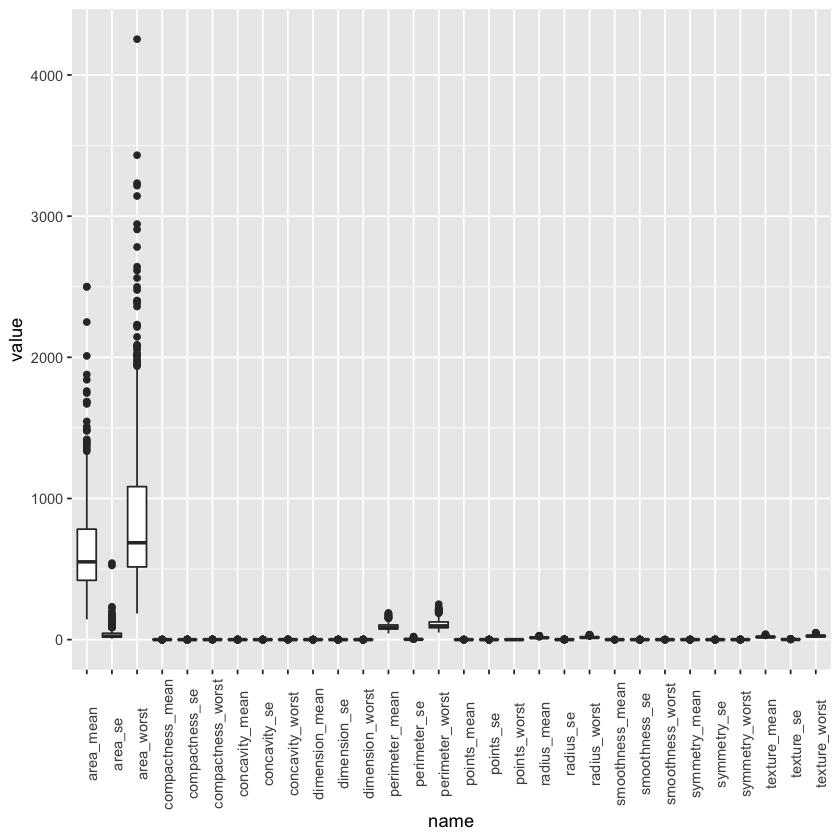

In [13]:
library(ggplot2)

# Plot boxplots
ggplot(data=mwbcd, aes(x=name, y=value)) + geom_boxplot() + theme(axis.text.x = element_text(angle = 90))

In [14]:
?scale

In [15]:
# Normalize the wbcd data
wbcd_n <- wbcd %>% mutate_if(is.numeric, scale, center = TRUE, scale = TRUE)

# Confirm that normalization worked
summary(wbcd_n[,c("radius_mean", "area_mean", "smoothness_mean")])

   radius_mean.V1       area_mean.V1     smoothness_mean.V1 
 Min.   :-2.027864   Min.   :-1.453164   Min.   :-3.109349  
 1st Qu.:-0.688779   1st Qu.:-0.666609   1st Qu.:-0.710338  
 Median :-0.214893   Median :-0.294927   Median :-0.034860  
 Mean   : 0.000000   Mean   : 0.000000   Mean   : 0.000000  
 3rd Qu.: 0.468980   3rd Qu.: 0.363188   3rd Qu.: 0.635640  
 Max.   : 3.967796   Max.   : 5.245913   Max.   : 4.766717  

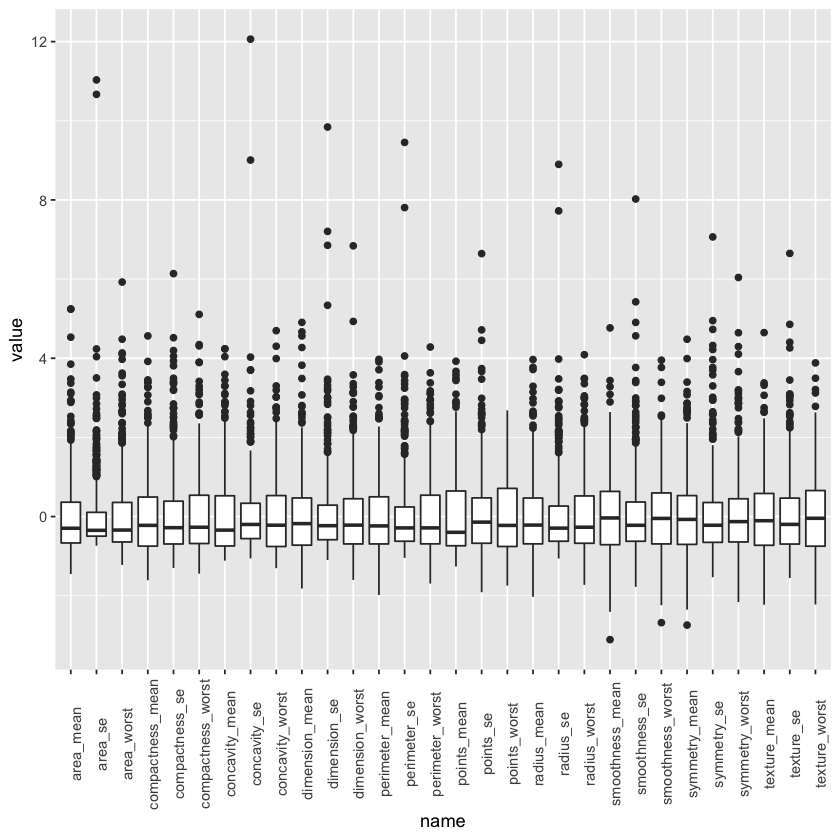

In [16]:
mwbcd_n <- wbcd_n %>% pivot_longer(cols = -diagnosis)

# Plot boxplots
ggplot(data=mwbcd_n, aes(x=name, y=value)) + geom_boxplot() + theme(axis.text.x = element_text(angle = 90))

In [17]:
# Notices that scales does not affect other properties...

cor(wbcd[,2:5])
cor(wbcd_n[,2:5])

,radius_mean,texture_mean,perimeter_mean,area_mean
radius_mean,1.0000000,0.3237819,0.9978553,0.9873572
texture_mean,0.3237819,1.0000000,0.3295331,0.3210857
perimeter_mean,0.9978553,0.3295331,1.0000000,0.9865068
area_mean,0.9873572,0.3210857,0.9865068,1.0000000


,radius_mean,texture_mean,perimeter_mean,area_mean
radius_mean,1.0000000,0.3237819,0.9978553,0.9873572
texture_mean,0.3237819,1.0000000,0.3295331,0.3210857
perimeter_mean,0.9978553,0.3295331,1.0000000,0.9865068
area_mean,0.9873572,0.3210857,0.9865068,1.0000000


## Option 1: Piece by piece

### Create training and test datasets

In [18]:
# Create training and test data (holdout 90%-10%)
n <- nrow(wbcd_n)
percent <- (n * 0.9) %>% floor
train_sample <- sample(1:n, percent) # randomly pick 90% of the rows
test_sample <- setdiff(1:n, train_sample) # get the remaining 10% of the rows
wbcd_train <- wbcd_n[train_sample,] # subset the 90% of the rows
wbcd_test <- wbcd_n[test_sample,] # subset 10% of the rows

In [19]:
wbcd_train

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,⋯,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
,<fct>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>",⋯,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
321,Benign,-0.47595587,-0.66952443,-0.37528460,-0.50634257,-0.08676551,0.88537349,0.8228906,-0.01183279,0.98627926,⋯,-0.51501456,-0.75610615,-0.28096721,-0.52688056,-0.65120508,0.96503333,1.04211991,0.29808427,0.53379312,1.07712169
38,Benign,-0.63202636,-1.07872818,-0.57035451,-0.63108891,1.33955824,0.47827489,-0.6485128,-0.48679796,0.66892642,⋯,-0.64536187,-1.49151301,-0.62498880,-0.65158263,0.43934904,-0.01630292,-0.85315325,-0.82434647,-0.28085150,1.08819511
17,Benign,0.44911644,-1.24612972,0.41281429,0.30351409,-0.12373900,-0.18406507,-0.2188831,0.26830131,0.01598207,⋯,0.25465522,-1.04571328,0.20947187,0.07414833,-0.44097778,-0.37731263,-0.48550669,0.34676654,-0.28731694,-0.73282882
524,Benign,-1.80681144,1.22071793,-1.81279344,-1.34660437,-3.10934889,-1.14974083,-1.1138927,-1.26071029,-0.81934896,⋯,-1.40965224,0.76351775,-1.43147540,-1.07486715,-1.85738422,-1.20649091,-1.30468267,-1.74352870,-0.04809589,-0.75054629
273,Benign,-0.01909501,-0.49049778,-0.09132208,-0.13011442,-1.13126680,-0.96058199,-0.7775899,-0.42288512,-0.62237134,⋯,-0.27914802,-0.05486643,-0.32263073,-0.34439399,-1.12859624,-0.83365941,-0.89916899,-0.54001155,-0.61058861,-0.98862482
306,Malignant,1.81118610,1.98099992,1.74620354,1.88713905,-0.33918073,0.05792191,0.8354346,0.88861665,-1.32638396,⋯,1.69675156,1.90404918,1.64983908,1.74129217,-0.44097778,0.13877872,0.68262197,0.63429624,-0.74959543,-0.03686437
332,Benign,-0.35677478,0.05820726,-0.38269232,-0.41399049,-0.35553439,-0.48304586,-0.8884782,-0.72208999,0.18013009,⋯,-0.37639124,-0.21105903,-0.36072308,-0.44556075,-0.48039540,-0.56608003,-0.96306376,-0.77231728,0.66633451,-0.36519127
183,Benign,-0.10138672,-1.39958113,-0.16087232,-0.20513272,-0.31145060,-0.79774255,-0.9805507,-0.76667435,-0.80111029,⋯,-0.33087314,-1.42317874,-0.38958995,-0.38549299,-0.67310376,-0.93471670,-1.12579649,-0.86085817,-0.12568110,-0.88619569
421,Benign,-1.24751159,-0.91830171,-1.16009117,-1.00788537,0.77073521,1.05199990,4.0391553,0.76414124,2.68612320,⋯,-1.08605989,-1.00666513,-1.07793072,-0.87832965,-0.13877604,0.14577010,2.63349748,0.64646681,0.33498104,2.32288144


In [20]:
wbcd_test

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,⋯,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
,<fct>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>",⋯,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
4,Benign,-0.80796035,-1.371681e+00,-0.78065139,-0.76748582,1.424881700,0.17531779,-0.532481406,-0.02471844,-0.14816595,⋯,-0.89984946,-1.611911476,-0.914550227,-0.7843640002,0.18970412,-0.458031347,-0.88915098,-0.43351907,-1.29107549,-0.89173240
8,Malignant,-0.09003614,1.037041e+00,-0.01683336,-0.16222453,2.555417474,1.37199833,0.840452144,1.10406477,1.60274627,⋯,0.60638603,2.631321008,0.632058943,0.4784640835,3.95189686,1.694679714,0.92228726,1.31889075,2.47503955,1.36503061
9,Benign,-1.03213432,8.172307e-05,-1.01070219,-0.90587185,0.250973169,-0.35144887,-0.738201920,-0.95119690,1.47872332,⋯,-0.97847164,-0.385148711,-0.983295025,-0.8391626597,-0.45849672,-0.671586386,-0.92184133,-1.25624954,-0.12083202,-0.46651307
30,Benign,-0.20637959,-5.439733e-01,-0.26704961,-0.29123327,-1.208057907,-0.89715035,-0.840309540,-0.88109895,-0.58954173,⋯,-0.31845911,-0.647096728,-0.401791405,-0.3812777064,-0.48477513,-0.550826096,-0.65087574,-0.68058162,-0.25822248,-0.44990294
55,Malignant,2.60005145,1.715947e+00,2.75447627,2.92716550,1.261345078,1.97033861,3.305335129,2.91424133,1.41671184,⋯,1.83123687,1.139356212,2.075402117,1.9415180387,0.92987941,1.032404862,2.47819437,2.41424197,0.48045330,0.20342885
60,Malignant,1.49620749,-2.579956e-01,1.44989481,1.39270025,0.521875137,0.75472324,0.925750894,1.17828614,0.29685758,⋯,1.55605923,0.483672665,1.343314651,1.3127385477,0.85104417,0.766732224,0.76410817,1.68248650,1.11406579,-0.33640038
65,Malignant,0.34412357,-1.169404e+00,0.43339128,0.14069028,0.777845502,2.06690618,1.491482307,1.25353835,2.58763439,⋯,0.37258849,-1.073372384,0.530876123,0.1761932724,0.29043804,2.168187166,1.71749672,1.89699278,2.85488377,0.85897531
75,Benign,0.76977034,3.960709e-02,0.67619982,0.64024396,-1.557884071,-0.60801567,-0.467880147,-0.54658739,0.11811862,⋯,0.40362356,0.389306298,0.388029788,0.2659436411,-1.95461434,-0.529216360,-0.40258249,-0.46014219,-0.60412318,-1.34131325
78,Benign,-0.79944742,-5.804381e-02,-0.83003618,-0.74105892,-1.064430091,-1.08555180,-0.648638233,-0.68601016,-1.07833806,⋯,-0.81502026,-0.298917376,-0.870803537,-0.7269307897,-0.14753551,-1.034629952,-0.61252929,-0.68453705,-0.80940069,-0.97090735


### Training a model on the data

In [21]:
library(class)

?knn

In [22]:
wbcd_test_pred <- knn(train = wbcd_train %>% select(-diagnosis), test = wbcd_test %>% select(-diagnosis), 
                      cl = wbcd_train$diagnosis, k=21)
wbcd_test_pred

[1] Benign    Malignant Benign    Benign    Malignant Malignant Malignant
 [8] Benign    Benign    Malignant Benign    Malignant Benign    Benign   
[15] Malignant Benign    Malignant Benign    Malignant Malignant Malignant
[22] Malignant Benign    Benign    Benign    Malignant Benign    Malignant
[29] Malignant Benign    Benign    Benign    Benign    Benign    Benign   
[36] Benign    Benign    Benign    Benign    Benign    Benign    Benign   
[43] Benign    Malignant Benign    Benign    Malignant Malignant Benign   
[50] Benign    Malignant Benign    Benign    Malignant Benign    Malignant
[57] Benign   
Levels: Benign Malignant

In [23]:
# Evaluating model performance
cfm <- table(wbcd_test_pred, wbcd_test$diagnosis)
cfm

              
wbcd_test_pred Benign Malignant
     Benign        35         1
     Malignant      0        21

In [24]:
# Accuracy
sum(diag(cfm))/length(wbcd_test_pred)

[1] 0.9824561

## Option 2: Using `caret`

### Training a model on the data

In [25]:
library(caret)

?train

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [26]:
# Using original data (no preprocessing) and holdout
knnModel <- train(x = wbcd[train_sample,] %>% select(-diagnosis), y = wbcd[train_sample, "diagnosis"],
                  method = "knn", preProc = c("center", "scale"))
knnModel

k-Nearest Neighbors 

512 samples
 30 predictor
  2 classes: 'Benign', 'Malignant' 

Pre-processing: centered (30), scaled (30) 
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 512, 512, 512, 512, 512, 512, ... 
Resampling results across tuning parameters:

  k  Accuracy   Kappa    
  5  0.9556234  0.9044399
  7  0.9598710  0.9134382
  9  0.9600896  0.9138962

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 9.

In [27]:
# Test it!
knnPred <- predict(knnModel, newdata = wbcd_test %>% select(-diagnosis))
postResample(pred = knnPred, obs = wbcd_test$diagnosis)
table(knnPred, wbcd_test$diagnosis)

Accuracy     Kappa 
0.8070175 0.5511811

           
knnPred     Benign Malignant
  Benign        35        11
  Malignant      0        11

In [28]:
# Using already preprocessed data and checking several k
knnModel <- train(wbcd_train %>% select(-diagnosis), wbcd_train$diagnosis, method="knn", 
                  metric="Accuracy", tuneGrid = data.frame(.k=1:15))
knnModel

k-Nearest Neighbors 

512 samples
 30 predictor
  2 classes: 'Benign', 'Malignant' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 512, 512, 512, 512, 512, 512, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   1  0.9506331  0.8942957
   2  0.9488350  0.8901877
   3  0.9491961  0.8910746
   4  0.9534020  0.8998250
   5  0.9563176  0.9060517
   6  0.9566718  0.9068571
   7  0.9584455  0.9105106
   8  0.9573934  0.9082779
   9  0.9601502  0.9143223
  10  0.9595782  0.9129227
  11  0.9580087  0.9093242
  12  0.9567227  0.9065186
  13  0.9570784  0.9071492
  14  0.9583648  0.9100584
  15  0.9568881  0.9067483

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 9.

In [29]:
# Test it!
knnPred <- predict(knnModel, newdata = wbcd_test %>% select(-diagnosis))
postResample(pred = knnPred, obs = wbcd_test$diagnosis)
table(knnPred, wbcd_test$diagnosis)

Accuracy     Kappa 
0.9824561 0.9626719

           
knnPred     Benign Malignant
  Benign        35         1
  Malignant      0        21

In [30]:
# Using CV over training data
# When using CV, remember to first divide the data into two sets (train and test) and then
# perform CV on the training data, leaving test data unseen for validation.
knnModel <- train(x = wbcd_train %>% select(-diagnosis), y = wbcd_train$diagnosis, method = "knn", 
                  trControl = trainControl(method = "cv"))

knnModel

k-Nearest Neighbors 

512 samples
 30 predictor
  2 classes: 'Benign', 'Malignant' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 460, 461, 461, 461, 461, 461, ... 
Resampling results across tuning parameters:

  k  Accuracy   Kappa    
  5  0.9706259  0.9353059
  7  0.9706259  0.9353059
  9  0.9667421  0.9267814

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 7.

In [31]:
# Test it!
knnPred <- predict(knnModel, newdata = wbcd_test %>% select(-diagnosis))
postResample(pred = knnPred, obs = wbcd_test$diagnosis)
table(knnPred, wbcd_test$diagnosis)

Accuracy     Kappa 
0.9824561 0.9626719

           
knnPred     Benign Malignant
  Benign        35         1
  Malignant      0        21

# What if the features are not quantitative?
## Import data file
We will use the "Breast Cancer Coimbra" dataset from the UCI Machine Learning Repository, which is available at https://archive.ics.uci.edu/ml/datasets/Breast+Cancer.

In [34]:
# Load data from UCI (Breast Cancer Coimbra Data Set)
cbcd <- read.csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer/breast-cancer.data")

# Examine the structure of the wbcd data frame
str(cbcd)
cbcd

'data.frame':	285 obs. of  10 variables:
 $ no.recurrence.events: chr  "no-recurrence-events" "no-recurrence-events" "no-recurrence-events" "no-recurrence-events" ...
 $ X30.39              : chr  "40-49" "40-49" "60-69" "40-49" ...
 $ premeno             : chr  "premeno" "premeno" "ge40" "premeno" ...
 $ X30.34              : chr  "20-24" "20-24" "15-19" "0-4" ...
 $ X0.2                : chr  "0-2" "0-2" "0-2" "0-2" ...
 $ no                  : chr  "no" "no" "no" "no" ...
 $ X3                  : int  2 2 2 2 2 2 1 2 2 3 ...
 $ left                : chr  "right" "left" "right" "right" ...
 $ left_low            : chr  "right_up" "left_low" "left_up" "right_low" ...
 $ no.1                : chr  "no" "no" "no" "no" ...


no.recurrence.events,X30.39,premeno,X30.34,X0.2,no,X3,left,left_low,no.1
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no
no-recurrence-events,50-59,premeno,25-29,0-2,no,2,left,left_low,no
no-recurrence-events,60-69,ge40,20-24,0-2,no,1,left,left_low,no
no-recurrence-events,40-49,premeno,50-54,0-2,no,2,left,left_low,no
no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,left_up,no


### Attribute Information:

1. Class: no-recurrence-events, recurrence-events 
2. age: 10-19, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80-89, 90-99. 
3. menopause: lt40, ge40, premeno. 
4. tumor-size: 0-4, 5-9, 10-14, 15-19, 20-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54, 55-59. 
5. inv-nodes: 0-2, 3-5, 6-8, 9-11, 12-14, 15-17, 18-20, 21-23, 24-26, 27-29, 30-32, 33-35, 36-39. 
6. node-caps: yes, no. 
7. deg-malig: 1, 2, 3. 
8. breast: left, right. 
9. breast-quad: left-up, left-low, right-up, right-low, central. 
10. irradiat: yes, no.

In [107]:
# Change names
names(cbcd) <- c("class", "age", "menopause", "tumor_size", "inv_nodes", "node_caps", "deg_malig", "breast", "breast_quad", "irradiat")
cbcd

class,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no
no-recurrence-events,50-59,premeno,25-29,0-2,no,2,left,left_low,no
no-recurrence-events,60-69,ge40,20-24,0-2,no,1,left,left_low,no
no-recurrence-events,40-49,premeno,50-54,0-2,no,2,left,left_low,no
no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,left_up,no


## Ordinal

In [108]:
age <- as.factor(cbcd$age)
age

[1] 40-49 40-49 60-69 40-49 60-69 50-59 60-69 40-49 40-49 40-49 50-59 60-69
 [13] 50-59 40-49 60-69 40-49 50-59 60-69 50-59 50-59 60-69 30-39 50-59 50-59
 [25] 40-49 50-59 60-69 40-49 60-69 50-59 50-59 50-59 50-59 50-59 30-39 50-59
 [37] 50-59 40-49 40-49 50-59 60-69 60-69 40-49 50-59 50-59 40-49 50-59 40-49
 [49] 40-49 50-59 30-39 50-59 70-79 70-79 70-79 50-59 50-59 60-69 60-69 40-49
 [61] 40-49 50-59 20-29 40-49 40-49 40-49 50-59 50-59 60-69 60-69 40-49 60-69
 [73] 50-59 30-39 50-59 50-59 30-39 50-59 40-49 50-59 60-69 60-69 50-59 40-49
 [85] 50-59 60-69 70-79 50-59 40-49 30-39 50-59 50-59 60-69 50-59 40-49 60-69
 [97] 60-69 40-49 30-39 40-49 50-59 50-59 40-49 40-49 40-49 40-49 30-39 40-49
[109] 60-69 50-59 50-59 40-49 40-49 40-49 50-59 30-39 40-49 30-39 60-69 60-69
[121] 50-59 50-59 50-59 60-69 70-79 30-39 30-39 50-59 40-49 40-49 40-49 40-49
[133] 50-59 60-69 30-39 30-39 40-49 30-39 40-49 50-59 50-59 60-69 40-49 60-69
[145] 40-49 60-69 50-59 30-39 50-59 50-59 60-69 50-59 60-69 30-39 60-69 50-59
[157] 50-59 50-59 40-49 40-49 40-49 60-69 60-69 60-69 40-49 40-49 40-49 50-59
[169] 40-49 30-39 30-39 60-69 50-59 50-59 40-49 40-49 60-69 50-59 40-49 40-49
[181] 40-49 40-49 50-59 50-59 40-49 50-59 60-69 40-49 50-59 40-49 40-49 50-59
[193] 30-39 50-59 50-59 50-59 40-49 50-59 50-59 60-69 50-59 40-49 50-59 50-59
[205] 30-39 50-59 50-59 50-59 40-49 40-49 50-59 40-49 50-59 60-69 40-49 50-59
[217] 40-49 60-69 30-39 40-49 30-39 60-69 60-69 30-39 40-49 40-49 50-59 60-69
[229] 60-69 50-59 40-49 30-39 70-79 60-69 50-59 40-49 40-49 30-39 40-49 60-69
[241] 40-49 50-59 50-59 40-49 30-39 30-39 50-59 60-69 30-39 40-49 40-49 30-39
[253] 60-69 40-49 40-49 40-49 40-49 50-59 50-59 60-69 40-49 60-69 50-59 50-59
[265] 30-39 40-49 60-69 30-39 40-49 50-59 50-59 40-49 60-69 60-69 40-49 30-39
[277] 60-69 50-59 50-59 50-59 30-39 30-39 60-69 40-49 50-59
Levels: 20-29 30-39 40-49 50-59 60-69 70-79

In [109]:
levels(age) <- 1:6
age

[1] 3 3 5 3 5 4 5 3 3 3 4 5 4 3 5 3 4 5 4 4 5 2 4 4 3 4 5 3 5 4 4 4 4 4 2 4 4
 [38] 3 3 4 5 5 3 4 4 3 4 3 3 4 2 4 6 6 6 4 4 5 5 3 3 4 1 3 3 3 4 4 5 5 3 5 4 2
 [75] 4 4 2 4 3 4 5 5 4 3 4 5 6 4 3 2 4 4 5 4 3 5 5 3 2 3 4 4 3 3 3 3 2 3 5 4 4
[112] 3 3 3 4 2 3 2 5 5 4 4 4 5 6 2 2 4 3 3 3 3 4 5 2 2 3 2 3 4 4 5 3 5 3 5 4 2
[149] 4 4 5 4 5 2 5 4 4 4 3 3 3 5 5 5 3 3 3 4 3 2 2 5 4 4 3 3 5 4 3 3 3 3 4 4 3
[186] 4 5 3 4 3 3 4 2 4 4 4 3 4 4 5 4 3 4 4 2 4 4 4 3 3 4 3 4 5 3 4 3 5 2 3 2 5
[223] 5 2 3 3 4 5 5 4 3 2 6 5 4 3 3 2 3 5 3 4 4 3 2 2 4 5 2 3 3 2 5 3 3 3 3 4 4
[260] 5 3 5 4 4 2 3 5 2 3 4 4 3 5 5 3 2 5 4 4 4 2 2 5 3 4
Levels: 1 2 3 4 5 6

In [111]:
tumor_size <- factor(cbcd$tumor_size, levels = c("0-4", "5-9", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54"))
tumor_size

[1] 20-24 20-24 15-19 0-4   15-19 25-29 20-24 50-54 20-24 0-4   25-29 10-14
 [13] 25-29 30-34 30-34 15-19 30-34 30-34 30-34 40-44 15-19 25-29 40-44 35-39
 [25] 25-29 20-24 25-29 40-44 30-34 40-44 15-19 10-14 10-14 10-14 30-34 0-4  
 [37] 15-19 10-14 30-34 20-24 25-29 5-9   10-14 50-54 30-34 25-29 25-29 20-24
 [49] 20-24 15-19 20-24 15-19 20-24 40-44 40-44 0-4   5-9   30-34 15-19 20-24
 [61] 10-14 0-4   35-39 25-29 10-14 25-29 20-24 35-39 50-54 10-14 25-29 20-24
 [73] 15-19 5-9   10-14 10-14 25-29 25-29 25-29 10-14 10-14 15-19 15-19 20-24
 [85] 35-39 25-29 0-4   20-24 40-44 0-4   20-24 25-29 20-24 10-14 30-34 30-34
 [97] 15-19 30-34 25-29 20-24 30-34 25-29 20-24 10-14 30-34 20-24 40-44 30-34
[109] 30-34 25-29 15-19 20-24 10-14 35-39 20-24 15-19 20-24 10-14 15-19 20-24
[121] 15-19 40-44 30-34 10-14 10-14 30-34 25-29 25-29 35-39 35-39 40-44 30-34
[133] 40-44 30-34 20-24 40-44 5-9   40-44 30-34 40-44 20-24 10-14 45-49 45-49
[145] 25-29 50-54 30-34 20-24 30-34 25-29 30-34 35-39 15-19 15-19 40-44 25-29
[157] 30-34 30-34 35-39 25-29 30-34 10-14 25-29 25-29 20-24 20-24 40-44 10-14
[169] 30-34 20-24 15-19 30-34 20-24 25-29 30-34 25-29 10-14 25-29 20-24 35-39
[181] 35-39 25-29 30-34 30-34 20-24 25-29 15-19 10-14 20-24 15-19 25-29 30-34
[193] 10-14 50-54 35-39 10-14 10-14 15-19 25-29 25-29 15-19 40-44 35-39 25-29
[205] 0-4   30-34 25-29 30-34 35-39 20-24 20-24 30-34 25-29 40-44 20-24 20-24
[217] 15-19 30-34 15-19 25-29 30-34 25-29 20-24 25-29 20-24 30-34 30-34 40-44
[229] 45-49 50-54 30-34 30-34 15-19 30-34 25-29 25-29 25-29 35-39 20-24 20-24
[241] 15-19 25-29 20-24 30-34 30-34 15-19 30-34 35-39 20-24 25-29 50-54 40-44
[253] 50-54 30-34 30-34 30-34 20-24 30-34 30-34 25-29 25-29 25-29 20-24 20-24
[265] 35-39 30-34 20-24 35-39 25-29 30-34 25-29 15-19 30-34 30-34 25-29 25-29
[277] 10-14 35-39 40-44 40-44 30-34 20-24 20-24 30-34 30-34
Levels: 0-4 5-9 10-14 15-19 20-24 25-29 30-34 35-39 40-44 45-49 50-54

In [112]:
levels(tumor_size) <- 1:11
tumor_size

[1] 5  5  4  1  4  6  5  11 5  1  6  3  6  7  7  4  7  7  7  9  4  6  9  8  6 
 [26] 5  6  9  7  9  4  3  3  3  7  1  4  3  7  5  6  2  3  11 7  6  6  5  5  4 
 [51] 5  4  5  9  9  1  2  7  4  5  3  1  8  6  3  6  5  8  11 3  6  5  4  2  3 
 [76] 3  6  6  6  3  3  4  4  5  8  6  1  5  9  1  5  6  5  3  7  7  4  7  6  5 
[101] 7  6  5  3  7  5  9  7  7  6  4  5  3  8  5  4  5  3  4  5  4  9  7  3  3 
[126] 7  6  6  8  8  9  7  9  7  5  9  2  9  7  9  5  3  10 10 6  11 7  5  7  6 
[151] 7  8  4  4  9  6  7  7  8  6  7  3  6  6  5  5  9  3  7  5  4  7  5  6  7 
[176] 6  3  6  5  8  8  6  7  7  5  6  4  3  5  4  6  7  3  11 8  3  3  4  6  6 
[201] 4  9  8  6  1  7  6  7  8  5  5  7  6  9  5  5  4  7  4  6  7  6  5  6  5 
[226] 7  7  9  10 11 7  7  4  7  6  6  6  8  5  5  4  6  5  7  7  4  7  8  5  6 
[251] 11 9  11 7  7  7  5  7  7  6  6  6  5  5  8  7  5  8  6  7  6  4  7  7  6 
[276] 6  3  8  9  9  7  5  5  7  7 
Levels: 1 2 3 4 5 6 7 8 9 10 11

In [113]:
factor(cbcd$inv_nodes)

[1] 0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2  
 [13] 0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2  
 [25] 0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2  
 [37] 0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2  
 [49] 0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2  
 [61] 0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2  
 [73] 0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2  
 [85] 0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2  
 [97] 0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2  
[109] 0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2  
[121] 0-2   0-2   0-2   0-2   0-2   6-8   6-8   0-2   9-11  9-11  3-5   6-8  
[133] 0-2   0-2   3-5   3-5   0-2   0-2   0-2   3-5   3-5   0-2   0-2   6-8  
[145] 0-2   0-2   3-5   0-2   0-2   15-17 3-5   15-17 0-2   0-2   3-5   3-5  
[157] 0-2   0-2   0-2   0-2   3-5   0-2   3-5   3-5   3-5   3-5   15-17 0-2  
[169] 0-2   3-5   0-2   6-8   3-5   3-5   0-2   0-2   0-2   3-5   0-2   0-2  
[181] 0-2   0-2   9-11  9-11  6-8   0-2   0-2   0-2   0-2   12-14 0-2   6-8  
[193] 0-2   0-2   0-2   3-5   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2  
[205] 0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2  
[217] 0-2   0-2   0-2   0-2   0-2   0-2   0-2   3-5   3-5   15-17 0-2   3-5  
[229] 0-2   9-11  3-5   3-5   9-11  0-2   3-5   0-2   0-2   0-2   3-5   3-5  
[241] 15-17 6-8   3-5   12-14 9-11  6-8   9-11  6-8   3-5   0-2   0-2   0-2  
[253] 0-2   0-2   6-8   0-2   3-5   6-8   3-5   3-5   12-14 0-2   0-2   0-2  
[265] 9-11  3-5   24-26 0-2   0-2   6-8   0-2   0-2   0-2   3-5   9-11  6-8  
[277] 6-8   15-17 6-8   6-8   0-2   0-2   0-2   3-5   3-5  
Levels: 0-2 12-14 15-17 24-26 3-5 6-8 9-11

In [114]:
inv_nodes <- factor(cbcd$inv_nodes, levels = c("0-2", "3-5", "6-8", "9-11", "12-14", "15-17", "18-20", "21-23", "24-26"))
inv_nodes

[1] 0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2  
 [13] 0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2  
 [25] 0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2  
 [37] 0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2  
 [49] 0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2  
 [61] 0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2  
 [73] 0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2  
 [85] 0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2  
 [97] 0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2  
[109] 0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2  
[121] 0-2   0-2   0-2   0-2   0-2   6-8   6-8   0-2   9-11  9-11  3-5   6-8  
[133] 0-2   0-2   3-5   3-5   0-2   0-2   0-2   3-5   3-5   0-2   0-2   6-8  
[145] 0-2   0-2   3-5   0-2   0-2   15-17 3-5   15-17 0-2   0-2   3-5   3-5  
[157] 0-2   0-2   0-2   0-2   3-5   0-2   3-5   3-5   3-5   3-5   15-17 0-2  
[169] 0-2   3-5   0-2   6-8   3-5   3-5   0-2   0-2   0-2   3-5   0-2   0-2  
[181] 0-2   0-2   9-11  9-11  6-8   0-2   0-2   0-2   0-2   12-14 0-2   6-8  
[193] 0-2   0-2   0-2   3-5   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2  
[205] 0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2   0-2  
[217] 0-2   0-2   0-2   0-2   0-2   0-2   0-2   3-5   3-5   15-17 0-2   3-5  
[229] 0-2   9-11  3-5   3-5   9-11  0-2   3-5   0-2   0-2   0-2   3-5   3-5  
[241] 15-17 6-8   3-5   12-14 9-11  6-8   9-11  6-8   3-5   0-2   0-2   0-2  
[253] 0-2   0-2   6-8   0-2   3-5   6-8   3-5   3-5   12-14 0-2   0-2   0-2  
[265] 9-11  3-5   24-26 0-2   0-2   6-8   0-2   0-2   0-2   3-5   9-11  6-8  
[277] 6-8   15-17 6-8   6-8   0-2   0-2   0-2   3-5   3-5  
Levels: 0-2 3-5 6-8 9-11 12-14 15-17 18-20 21-23 24-26

In [115]:
levels(inv_nodes) <- 1:9
inv_nodes

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 1 4 4 2 3 1 1 2 2 1 1 1 2 2 1 1 3 1 1 2 1
[149] 1 6 2 6 1 1 2 2 1 1 1 1 2 1 2 2 2 2 6 1 1 2 1 3 2 2 1 1 1 2 1 1 1 1 4 4 3
[186] 1 1 1 1 5 1 3 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[223] 1 2 2 6 1 2 1 4 2 2 4 1 2 1 1 1 2 2 6 3 2 5 4 3 4 3 2 1 1 1 1 1 3 1 2 3 2
[260] 2 5 1 1 1 4 2 9 1 1 3 1 1 1 2 4 3 3 6 3 3 1 1 1 2 2
Levels: 1 2 3 4 5 6 7 8 9

In [116]:
deg_malig <- factor(as.numeric(cbcd$deg_malig))
deg_malig

[1] 2 2 2 2 2 2 1 2 2 3 2 1 3 3 1 2 3 3 1 2 2 2 2 2 2 1 3 2 2 3 2 3 1 1 2 2 1
 [38] 2 1 1 2 1 2 1 1 2 1 1 1 2 2 1 3 1 1 1 2 1 1 2 1 1 2 1 1 1 3 3 2 1 2 2 2 2
 [75] 1 2 1 2 2 2 1 2 2 1 3 2 1 3 1 2 3 2 2 1 2 2 2 1 2 3 3 2 2 2 1 2 2 3 1 1 1
[112] 2 1 2 2 1 3 1 1 1 2 3 1 1 2 2 2 2 2 2 3 2 3 2 2 3 1 2 2 2 2 1 2 3 2 2 2 3
[149] 3 3 3 3 3 3 2 3 1 1 1 3 2 2 1 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 3 3 3 1 3 3 2
[186] 1 2 2 2 3 2 2 2 2 2 1 2 2 1 3 2 1 2 2 2 3 2 3 1 2 2 3 1 2 2 2 2 3 1 3 1 3
[223] 3 3 3 3 3 3 1 2 2 3 1 3 3 2 2 3 2 2 3 3 3 3 2 3 3 3 2 3 2 1 3 3 3 1 2 2 3
[260] 2 3 3 1 1 3 2 3 3 2 3 3 3 2 2 3 3 3 3 3 3 2 3 1 3 3
Levels: 1 2 3

In [118]:
cbcd_new <- cbcd %>%
    select(class, menopause, node_caps, breast, breast_quad, irradiat) %>%
    mutate(age = age, tumor_size = tumor_size, inv_nodes = inv_nodes, deg_malig = deg_malig)
cbcd_new

class,menopause,node_caps,breast,breast_quad,irradiat,age,tumor_size,inv_nodes,deg_malig
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,<fct>,<fct>,<fct>
no-recurrence-events,premeno,no,right,right_up,no,3,5,1,2
no-recurrence-events,premeno,no,left,left_low,no,3,5,1,2
no-recurrence-events,ge40,no,right,left_up,no,5,4,1,2
no-recurrence-events,premeno,no,right,right_low,no,3,1,1,2
no-recurrence-events,ge40,no,left,left_low,no,5,4,1,2
no-recurrence-events,premeno,no,left,left_low,no,4,6,1,2
no-recurrence-events,ge40,no,left,left_low,no,5,5,1,1
no-recurrence-events,premeno,no,left,left_low,no,3,11,1,2
no-recurrence-events,premeno,no,right,left_up,no,3,5,1,2


## Nominal

In [119]:
nbreast <- factor(cbcd$breast)
nbreast

[1] right left  right right left  left  left  left  right left  left  left 
 [13] left  left  left  left  left  left  right left  left  right left  right
 [25] left  left  right right left  right right left  right left  left  left 
 [37] right left  left  right left  left  left  right left  right right right
 [49] right left  left  left  left  right right right right left  right left 
 [61] right left  right left  right right left  left  left  left  right left 
 [73] right left  left  left  left  left  right right left  right right left 
 [85] left  right left  right right right left  right right left  right left 
 [97] right left  left  left  right right left  right right left  right right
[109] right left  right right right right right left  left  right left  left 
[121] right left  right right left  right right left  right right right left 
[133] left  left  right right left  left  left  left  left  left  left  left 
[145] left  right left  left  right right left  left  right right right right
[157] left  right left  right right right right right right right right right
[169] left  right left  right right left  right left  left  right right right
[181] right right left  left  right left  left  right right right left  left 
[193] left  right left  right left  left  left  right left  left  left  left 
[205] right left  left  left  right left  right right right right right left 
[217] left  right right left  right left  right left  right left  right right
[229] right right right right left  right left  right right left  right left 
[241] left  left  right left  right left  left  left  left  left  right left 
[253] right right right left  left  left  right right left  left  left  left 
[265] left  left  left  left  left  left  right right right left  right left 
[277] left  right left  left  left  left  right left  left 
Levels: left right

In [120]:
levels(nbreast) <- 0:1
nbreast

[1] 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1
 [38] 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0
 [75] 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 1 0 1
[112] 1 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0
[149] 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0 0 1
[186] 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1 0 1 0
[223] 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1
[260] 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0
Levels: 0 1

In [121]:
nirradiat <- factor(cbcd$irradiat)
nirradiat

[1] no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no 
 [19] no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no 
 [37] no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no 
 [55] no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no 
 [73] no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no 
 [91] no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no 
[109] no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no 
[127] yes no  yes yes yes no  no  yes no  yes yes yes no  no  no  no  yes no 
[145] yes yes yes no  no  no  no  no  yes no  yes no  no  no  no  yes no  yes
[163] yes yes no  no  yes no  yes yes no  no  no  yes yes no  no  yes yes yes
[181] yes yes yes yes yes no  yes no  no  yes yes no  no  yes no  no  yes yes
[199] no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no 
[217] no  no  no  no  no  yes no  yes yes no  yes no  yes no  no  yes yes yes
[235] yes no  no  no  yes yes no  yes no  yes yes yes yes no  no  no  yes no 
[253] no  no  no  yes yes yes no  no  yes no  no  no  no  no  yes no  yes no 
[271] yes no  yes yes no  yes yes no  yes yes no  yes no  no  no 
Levels: no yes

In [122]:
levels(nirradiat) <- 0:1
nirradiat

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[112] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 1 0
[149] 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1
[186] 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
[223] 0 1 1 0 1 0 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 1 0
[260] 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0
Levels: 0 1

In [123]:
cbcd_new <- cbcd %>% 
    select(class, menopause, node_caps, breast_quad) %>% 
    mutate(age=age, tumor_size=tumor_size, inv_nodes=inv_nodes, deg_malig=deg_malig, breast=nbreast, irradiat=nirradiat)
cbcd_new

class,menopause,node_caps,breast_quad,age,tumor_size,inv_nodes,deg_malig,breast,irradiat
<chr>,<chr>,<chr>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
no-recurrence-events,premeno,no,right_up,3,5,1,2,1,0
no-recurrence-events,premeno,no,left_low,3,5,1,2,0,0
no-recurrence-events,ge40,no,left_up,5,4,1,2,1,0
no-recurrence-events,premeno,no,right_low,3,1,1,2,1,0
no-recurrence-events,ge40,no,left_low,5,4,1,2,0,0
no-recurrence-events,premeno,no,left_low,4,6,1,2,0,0
no-recurrence-events,ge40,no,left_low,5,5,1,1,0,0
no-recurrence-events,premeno,no,left_low,3,11,1,2,0,0
no-recurrence-events,premeno,no,left_up,3,5,1,2,1,0


### Missing values

In [124]:
node_caps <- factor(cbcd$node_caps)
node_caps

[1] no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no 
 [19] no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no 
 [37] no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no 
 [55] no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no 
 [73] no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no 
 [91] no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no 
[109] no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  yes
[127] yes yes yes yes yes no  no  no  no  no  no  no  no  yes yes no  no  yes
[145] ?   no  yes no  no  yes yes no  no  no  no  yes no  no  no  no  yes no 
[163] ?   ?   no  no  yes no  no  yes no  yes yes yes no  no  no  no  no  yes
[181] yes no  ?   ?   no  no  no  no  yes no  no  yes no  yes no  no  no  yes
[199] no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no 
[217] no  no  no  no  no  no  no  yes no  yes no  yes no  yes no  no  ?   no 
[235] yes no  no  no  yes no  yes no  yes yes no  yes yes yes yes no  no  no 
[253] no  yes yes no  yes yes no  no  yes no  ?   ?   yes yes yes no  no  yes
[271] no  yes yes yes yes yes yes yes yes yes no  no  no  no  no 
Levels: ? no yes

In [125]:
table(cbcd$node_caps)


  ?  no yes 
  8 221  56 

In [159]:
# Elimino las filas con este dato faltante y lo paso a (0,1)
cbcd_new <- cbcd %>% 
    select(class, menopause, node_caps, breast_quad) %>% 
    mutate(age=age, tumor_size=tumor_size, inv_nodes=inv_nodes, deg_malig=deg_malig, breast=nbreast, irradiat=nirradiat) %>%
    filter(node_caps != '?') %>%
    mutate(node_caps = as.numeric(factor(node_caps))-1)
cbcd_new

class,menopause,node_caps,breast_quad,age,tumor_size,inv_nodes,deg_malig,breast,irradiat
<chr>,<chr>,<dbl>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
no-recurrence-events,premeno,0,right_up,3,5,1,2,1,0
no-recurrence-events,premeno,0,left_low,3,5,1,2,0,0
no-recurrence-events,ge40,0,left_up,5,4,1,2,1,0
no-recurrence-events,premeno,0,right_low,3,1,1,2,1,0
no-recurrence-events,ge40,0,left_low,5,4,1,2,0,0
no-recurrence-events,premeno,0,left_low,4,6,1,2,0,0
no-recurrence-events,ge40,0,left_low,5,5,1,1,0,0
no-recurrence-events,premeno,0,left_low,3,11,1,2,0,0
no-recurrence-events,premeno,0,left_up,3,5,1,2,1,0


In [160]:
breast_quad <- factor(cbcd$breast_quad)
breast_quad

[1] right_up  left_low  left_up   right_low left_low  left_low  left_low 
  [8] left_low  left_up   central   left_low  right_up  right_up  left_up  
 [15] left_low  left_low  left_low  left_low  right_up  left_low  left_low 
 [22] left_low  left_up   left_up   left_up   left_low  left_up   left_low 
 [29] left_low  left_up   left_low  left_low  left_up   left_up   left_up  
 [36] central   central   left_low  left_low  left_low  left_low  central  
 [43] left_up   right_up  left_up   left_low  left_up   right_up  left_low 
 [50] left_low  right_low left_low  left_up   left_up   right_up  central  
 [57] right_up  left_up   left_up   central   right_low left_low  right_up 
 [64] right_low left_up   right_low left_up   left_low  left_low  left_low 
 [71] left_up   left_up   right_low right_low left_low  left_low  central  
 [78] left_low  central   left_low  left_up   left_low  left_low  right_low
 [85] left_up   left_low  right_low left_up   left_up   central   left_up  
 [92] left_up   left_up   left_low  right_low left_up   left_up   right_up 
 [99] left_low  left_low  left_low  right_low right_low left_low  left_up  
[106] left_up   right_up  right_up  left_up   left_low  central   left_up  
[113] left_up   right_up  left_up   left_low  left_up   left_low  right_low
[120] left_low  right_up  left_up   left_low  left_low  central   right_up 
[127] left_up   left_up   left_up   right_up  left_up   left_up   right_up 
[134] left_low  central   right_up  left_low  left_low  right_low left_low 
[141] left_low  left_up   left_low  central   right_low left_up   left_low 
[148] central   left_up   left_up   left_low  left_low  left_up   left_up  
[155] left_up   left_up   central   central   left_low  left_up   left_low 
[162] left_up   left_up   left_low  left_up   left_low  left_up   left_up  
[169] left_up   left_up   left_low  right_up  left_up   left_low  right_up 
[176] left_low  left_low  left_up   left_low  left_up   left_low  left_low 
[183] left_up   left_low  left_low  right_low left_up   left_up   left_up  
[190] right_low left_up   left_low  right_low left_up   left_up   left_up  
[197] left_low  central   left_low  left_low  left_low  left_low  left_low 
[204] right_up  central   ?         right_up  right_up  left_up   left_low 
[211] central   right_up  left_up   left_low  left_up   left_up   left_up  
[218] central   left_low  right_up  left_up   right_low left_low  left_low 
[225] left_low  left_low  left_up   left_low  right_up  left_up   left_up  
[232] left_up   left_low  left_up   left_low  left_low  left_low  left_low 
[239] right_up  left_low  left_low  left_low  right_up  left_up   left_up  
[246] left_low  right_low left_low  left_low  left_up   left_low  left_up  
[253] left_up   right_up  left_up   left_low  left_low  right_low left_up  
[260] right_up  right_low left_up   left_up   left_low  left_low  right_up 
[267] left_low  left_low  left_low  right_low left_low  left_up   right_up 
[274] central   left_up   right_low left_up   right_up  left_low  left_low 
[281] left_up   left_up   left_up   left_low  left_low 
Levels: ? central left_low left_up right_low right_up

In [161]:
table(cbcd$breast_quad)


        ?   central  left_low   left_up right_low  right_up 
        1        21       109        97        24        33 

In [163]:
# Elimino las filas con este dato faltante
cbcd_new <- cbcd %>% 
    select(class, menopause, node_caps, breast_quad) %>% 
    mutate(age=age, tumor_size=tumor_size, inv_nodes=inv_nodes, deg_malig=deg_malig, breast=nbreast, irradiat=nirradiat) %>%
    filter(node_caps != '?', breast_quad != '?') %>%
    mutate(node_caps = as.numeric(factor(node_caps))-1)
cbcd_new

class,menopause,node_caps,breast_quad,age,tumor_size,inv_nodes,deg_malig,breast,irradiat
<chr>,<chr>,<dbl>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
no-recurrence-events,premeno,0,right_up,3,5,1,2,1,0
no-recurrence-events,premeno,0,left_low,3,5,1,2,0,0
no-recurrence-events,ge40,0,left_up,5,4,1,2,1,0
no-recurrence-events,premeno,0,right_low,3,1,1,2,1,0
no-recurrence-events,ge40,0,left_low,5,4,1,2,0,0
no-recurrence-events,premeno,0,left_low,4,6,1,2,0,0
no-recurrence-events,ge40,0,left_low,5,5,1,1,0,0
no-recurrence-events,premeno,0,left_low,3,11,1,2,0,0
no-recurrence-events,premeno,0,left_up,3,5,1,2,1,0


In [164]:
dummy <- dummyVars("~breast_quad", data=cbcd_new)
cbcd_final <- cbcd_new %>%
    mutate(breast_quad, data.frame(predict(dummy, newdata = cbcd_new))) %>%
    select(-breast_quad)
cbcd_final

class,menopause,node_caps,age,tumor_size,inv_nodes,deg_malig,breast,irradiat,breast_quadcentral,breast_quadleft_low,breast_quadleft_up,breast_quadright_low,breast_quadright_up
<chr>,<chr>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
no-recurrence-events,premeno,0,3,5,1,2,1,0,0,0,0,0,1
no-recurrence-events,premeno,0,3,5,1,2,0,0,0,1,0,0,0
no-recurrence-events,ge40,0,5,4,1,2,1,0,0,0,1,0,0
no-recurrence-events,premeno,0,3,1,1,2,1,0,0,0,0,1,0
no-recurrence-events,ge40,0,5,4,1,2,0,0,0,1,0,0,0
no-recurrence-events,premeno,0,4,6,1,2,0,0,0,1,0,0,0
no-recurrence-events,ge40,0,5,5,1,1,0,0,0,1,0,0,0
no-recurrence-events,premeno,0,3,11,1,2,0,0,0,1,0,0,0
no-recurrence-events,premeno,0,3,5,1,2,1,0,0,0,1,0,0


In [167]:
factor(cbcd$menopause)

[1] premeno premeno ge40    premeno ge40    premeno ge40    premeno premeno
 [10] premeno ge40    lt40    ge40    premeno lt40    premeno premeno ge40   
 [19] ge40    ge40    ge40    premeno premeno premeno premeno premeno ge40   
 [28] premeno ge40    ge40    premeno premeno ge40    ge40    premeno ge40   
 [37] ge40    premeno premeno ge40    ge40    ge40    premeno ge40    ge40   
 [46] premeno premeno premeno premeno lt40    premeno premeno ge40    ge40   
 [55] ge40    ge40    ge40    ge40    ge40    premeno premeno ge40    premeno
 [64] premeno premeno premeno ge40    ge40    ge40    ge40    premeno ge40   
 [73] premeno premeno ge40    ge40    premeno premeno premeno ge40    ge40   
 [82] ge40    ge40    premeno ge40    ge40    ge40    ge40    premeno premeno
 [91] ge40    ge40    ge40    premeno premeno ge40    ge40    premeno premeno
[100] ge40    ge40    premeno premeno premeno premeno premeno premeno premeno
[109] ge40    ge40    ge40    premeno premeno premeno ge40    premeno ge40   
[118] premeno ge40    ge40    ge40    ge40    ge40    ge40    ge40    premeno
[127] premeno premeno premeno premeno premeno premeno ge40    ge40    premeno
[136] premeno premeno premeno premeno ge40    premeno ge40    premeno ge40   
[145] premeno ge40    premeno premeno lt40    ge40    ge40    ge40    ge40   
[154] lt40    ge40    ge40    premeno ge40    premeno premeno premeno ge40   
[163] ge40    ge40    premeno premeno ge40    premeno ge40    premeno premeno
[172] ge40    ge40    premeno premeno ge40    ge40    premeno premeno premeno
[181] premeno premeno ge40    ge40    premeno ge40    ge40    premeno ge40   
[190] premeno premeno ge40    premeno premeno ge40    premeno premeno ge40   
[199] premeno ge40    premeno premeno ge40    premeno premeno ge40    premeno
[208] premeno premeno premeno ge40    premeno premeno ge40    ge40    ge40   
[217] premeno ge40    premeno premeno premeno ge40    ge40    premeno ge40   
[226] premeno premeno ge40    ge40    premeno premeno premeno ge40    ge40   
[235] premeno premeno premeno premeno premeno ge40    premeno ge40    ge40   
[244] premeno premeno premeno ge40    ge40    premeno premeno premeno premeno
[253] ge40    premeno premeno premeno premeno ge40    ge40    ge40    ge40   
[262] ge40    lt40    lt40    premeno premeno ge40    premeno premeno ge40   
[271] premeno premeno ge40    ge40    premeno premeno ge40    premeno ge40   
[280] ge40    premeno premeno ge40    ge40    ge40   
Levels: ge40 lt40 premeno

In [169]:
dummy_bq <- dummyVars("~breast_quad", data=cbcd_new)
dummy_men <- dummyVars("~menopause", data=cbcd_new)

cbcd_final <- cbcd_new %>%
    mutate(breast_quad, data.frame(predict(dummy_bq, newdata = cbcd_new))) %>%
    mutate(menopause, data.frame(predict(dummy_men, newdata = cbcd_new))) %>%
    select(-breast_quad, -menopause)

In [170]:
cbcd_final

class,node_caps,age,tumor_size,inv_nodes,deg_malig,breast,irradiat,breast_quadcentral,breast_quadleft_low,breast_quadleft_up,breast_quadright_low,breast_quadright_up,menopausege40,menopauselt40,menopausepremeno
<chr>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
no-recurrence-events,0,3,5,1,2,1,0,0,0,0,0,1,0,0,1
no-recurrence-events,0,3,5,1,2,0,0,0,1,0,0,0,0,0,1
no-recurrence-events,0,5,4,1,2,1,0,0,0,1,0,0,1,0,0
no-recurrence-events,0,3,1,1,2,1,0,0,0,0,1,0,0,0,1
no-recurrence-events,0,5,4,1,2,0,0,0,1,0,0,0,1,0,0
no-recurrence-events,0,4,6,1,2,0,0,0,1,0,0,0,0,0,1
no-recurrence-events,0,5,5,1,1,0,0,0,1,0,0,0,1,0,0
no-recurrence-events,0,3,11,1,2,0,0,0,1,0,0,0,0,0,1
no-recurrence-events,0,3,5,1,2,1,0,0,0,1,0,0,0,0,1


# Exercise: <i>k-nn using other distance measures</i>
* Create a function `my_knn` that accepts any measure from the `philentropy` package and performs basic knn.


In [74]:
library(philentropy)

getDistMethods()

[1] "euclidean"         "manhattan"         "minkowski"        
 [4] "chebyshev"         "sorensen"          "gower"            
 [7] "soergel"           "kulczynski_d"      "canberra"         
[10] "lorentzian"        "intersection"      "non-intersection" 
[13] "wavehedges"        "czekanowski"       "motyka"           
[16] "kulczynski_s"      "tanimoto"          "ruzicka"          
[19] "inner_product"     "harmonic_mean"     "cosine"           
[22] "hassebrook"        "jaccard"           "dice"             
[25] "fidelity"          "bhattacharyya"     "hellinger"        
[28] "matusita"          "squared_chord"     "squared_euclidean"
[31] "pearson"           "neyman"            "squared_chi"      
[34] "prob_symm"         "divergence"        "clark"            
[37] "additive_symm"     "kullback-leibler"  "jeffreys"         
[40] "k_divergence"      "topsoe"            "jensen-shannon"   
[43] "jensen_difference" "taneja"            "kumar-johnson"    
[46] "avg"

In [75]:
?distance

* Select two distance/similarity measures and apply your knn function to each of them with different k choices for the breast cancer data and do a plot comparing the results (try using a plot). Possible function interface:
>my_knn <- function(train, train_labels, test, k=1, metric=“euclidean”) {
}